In [34]:
import sys
import os

# print("sys.path", sys.path)

import matplotlib
import matplotlib.pyplot as plt

import natsort
# import seaborn as sns
import datetime
import json
import warnings
from pathlib import Path
import random
import base64
from io import BytesIO
import cv2
# import vision_pipeline.obb
# import imagesize
# from scipy import ndimage
import natsort
from PIL import Image as PILImage
# from PIL import ImageDraw, ImageFilter
import numpy as np
from tqdm import tqdm
# from shapely.geometry import Polygon
# from rich import print
# from types import SimpleNamespace
import pickle
import imutils

# ros package
from context_action_framework.types import Detection, Label, Module, Camera, detections_to_ros, detections_to_py
from sensor_msgs.msg import Image, CameraInfo# CameraInfo needed for pickle

from context_action_framework.srv import VisionDetection, VisionDetectionResponse, VisionDetectionRequest, ProcessImg, ProcessImgResponse

from context_action_framework.graph_relations import GraphRelations

from cv_bridge import CvBridge
import rospy


rospy.init_node("test_node")

detection.box [[-0.00107791  0.00950971]
 [ 0.29300001  0.09874654]
 [ 0.05029543  0.29300001]]
detection.box [[0.00776103 0.01198784]
 [0.301      0.07988138]
 [0.04785243 0.301     ]]


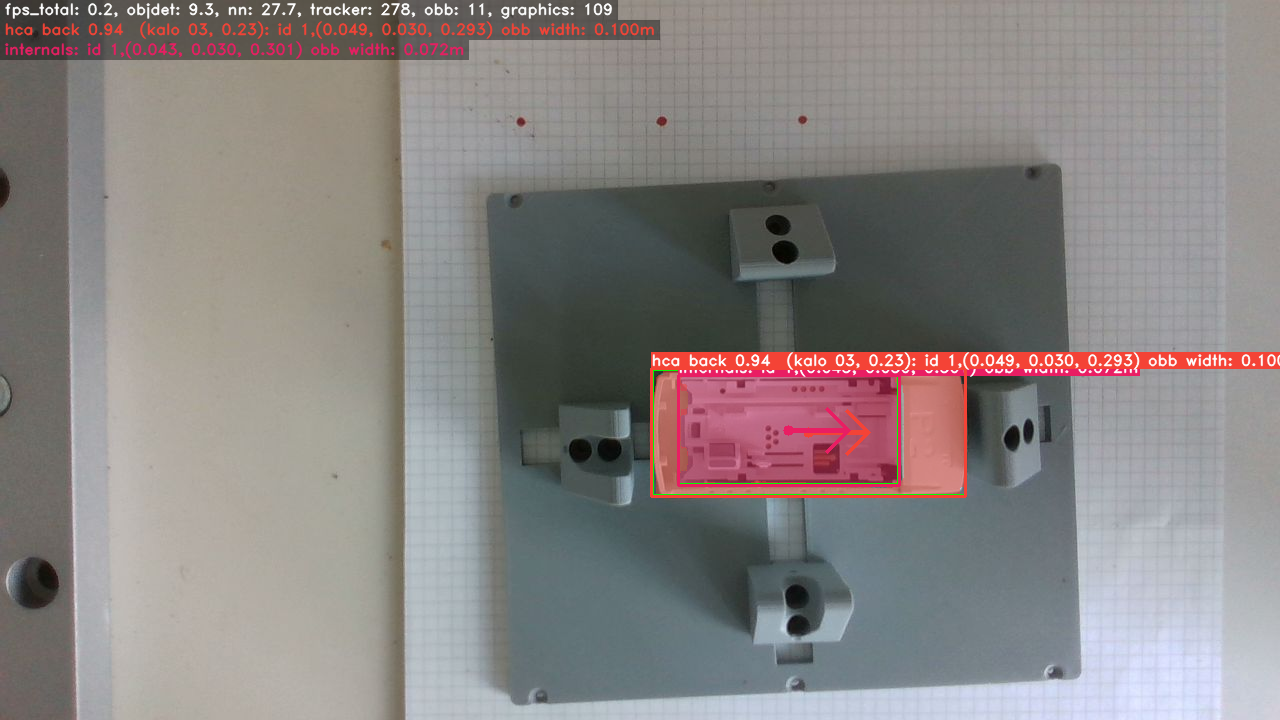

detection.box [[-0.00107791  0.00950971]
 [ 0.29300001  0.09874654]
 [ 0.05029543  0.29300001]]
detection.box [[0.00776103 0.01198784]
 [0.301      0.07988138]
 [0.04785243 0.301     ]]


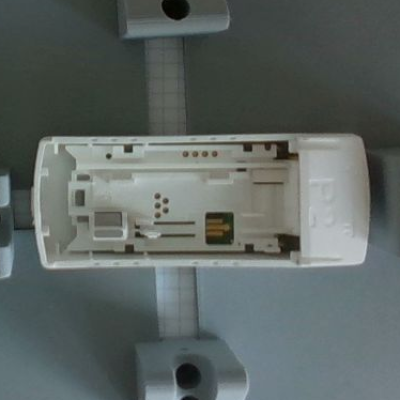

Detection(id=0, tracking_id=1, label=<Label.hca: 0>, label_face=<LabelFace.back: 1>, label_precise='03', label_precise_name='kalo', score=0.9362685084342957, tf_px=translation: 
  x: 808.0
  y: 432.0
  z: 0.0
rotation: 
  x: 1.0
  y: 0.0
  z: 0.0
  w: 6.123233995736766e-17, box_px=array([[651.63269043, 368.85620117],
       [965.35375977, 496.81396484]]), obb_px=array([[652., 369.],
       [965., 369.],
       [965., 495.],
       [652., 495.]]), center_px=array([808., 432.]), polygon_px=<POLYGON ((664 369, 652 393, 658 495, 957 495, 965 486, 965 384, 959 369, 66...>, edge_px_small=None, edge_px_large=None, tf=translation: 
  x: 0.04867737367749214
  y: 0.02963639609515667
  z: 0.2930000126361847
rotation: 
  x: 1.0
  y: 0.0
  z: 0.0
  w: 6.123233995736766e-17, box=array([[-0.00107791,  0.00950971],
       [ 0.29300001,  0.09874654],
       [ 0.05029543,  0.29300001]]), obb=array([[-0.00096103,  0.00955555],
       [ 0.29300001,  0.09863397],
       [ 0.00955555,  0.29300001],
       [

In [37]:
# service_name = 'vision/realsense/get_detection'
service_name = 'vision/basler/get_detection'


timeout = 3 # 3 second timeout
rospy.wait_for_service(service_name, timeout)

vision_det_srv = rospy.ServiceProxy(service_name, VisionDetection)

response = vision_det_srv()
img = CvBridge().imgmsg_to_cv2(response.image, desired_encoding='passthrough')
vision_details = response.vision_details
detections = detections_to_py(vision_details.detections)
detection_groups = vision_details.detection_groups

display(PILImage.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

if detection_groups is not None:
    if len(detection_groups) > 0:
        for detection_group in detection_groups:
            group_cropped_img = CvBridge().imgmsg_to_cv2(detection_group.cropped_image, desired_encoding='passthrough')
            group_detections_list = detections_to_py(detection_group.detections)

            display(PILImage.fromarray(cv2.cvtColor(group_cropped_img, cv2.COLOR_BGR2RGB)))
            
            for detection in group_detections_list:
                print(detection)
    else:
        print("detection_groups list empty")
else:
    print("detection_groups is None!")



# detections = detections_to_py(response.detections)
# detections = detections_to_py(response.detections)


# labelled_img = CvBridge().imgmsg_to_cv2(response.labelled_image, desired_encoding='passthrough')